In [3]:
import pandas as pd

# Load the data
data = pd.read_csv('parsedSurveyData.csv')
print(data.head())

       program               residence  rating  \
0  Engineering          UW Place (UWP)     7.0   
1  Engineering  Ron Eydt Village (REV)    10.0   
2  Engineering  Ron Eydt Village (REV)    10.0   
3  Engineering  Ron Eydt Village (REV)     6.0   
4  Engineering               Village 1     6.0   

   residence_Claudette Millar Hall (CMH)  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   residence_Columbia Lake Village South (CLV-South)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   residence_Mackenzie King Village (MKV)  residence_Ron Eydt Village (REV)  \
0                 

In [4]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'program' categorical variable
# le_program = LabelEncoder()
# data['program_encoded'] = le_program.fit_transform(data['program'])

personality_traits = ['extraversion', 'agreeableness', 'conscientiousness', 'emotionalStability', 'Openness', 'program_AFM', 'program_Arts', 'program_Engineering', 'program_Environment', 'program_Health', 'program_Mathematics', 'program_Science']
data[personality_traits] = data[personality_traits].astype(float)

data[personality_traits] = data[personality_traits].fillna(data[personality_traits].mean())

le_residency = LabelEncoder()
data['Residency_encoded'] = le_residency.fit_transform(data['rating'])

X = data[personality_traits]
Y = data['Residency_encoded']


In [5]:
from sklearn.model_selection import train_test_split

# Split the dataset into a training set and a testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [13]:
from sklearn.svm import SVC

# Initialize the Support Vector Classifier with a linear kernel
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, Y_train)

Y_pred = svm_classifier.predict(X_test)


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the output labels for the SVM predictions
Y_test_binarized = label_binarize(Y_test, classes=np.unique(Y_test))
Y_pred_svm_binarized = label_binarize(Y_pred, classes=np.unique(Y_test))

residence_names = ['residence_Claudette Millar Hall (CMH)', 
                  'residence_Mackenzie King Village (MKV)',
                  'residence_Ron Eydt Village (REV)', 
                  'residence_UW Place (UWP)', 
                  'residence_Village 1']

# Print out the metrics for each residence
for i, residence_name in enumerate(residence_names):
    print(f"Scores for {residence_name}:")
    accuracy = accuracy_score(Y_test_binarized[:, i], Y_pred_svm_binarized[:, i])
    precision = precision_score(Y_test_binarized[:, i], Y_pred_svm_binarized[:, i], zero_division=0)
    recall = recall_score(Y_test_binarized[:, i], Y_pred_svm_binarized[:, i], zero_division=0)
    f1 = f1_score(Y_test_binarized[:, i], Y_pred_svm_binarized[:, i], zero_division=0)

    print(f"\tAccuracy: {accuracy:.4f}")
    print(f"\tPrecision: {precision:.4f}")
    print(f"\tRecall: {recall:.4f}")
    print(f"\tF1 Score: {f1:.4f}\n")


Scores for residence_Claudette Millar Hall (CMH):
	Accuracy: 0.8846
	Precision: 0.3571
	Recall: 0.6250
	F1 Score: 0.4545

Scores for residence_Mackenzie King Village (MKV):
	Accuracy: 0.8462
	Precision: 0.3750
	Recall: 0.2143
	F1 Score: 0.2727

Scores for residence_Ron Eydt Village (REV):
	Accuracy: 0.7885
	Precision: 0.2857
	Recall: 0.4615
	F1 Score: 0.3529

Scores for residence_UW Place (UWP):
	Accuracy: 0.9423
	Precision: 0.5000
	Recall: 0.3333
	F1 Score: 0.4000

Scores for residence_Village 1:
	Accuracy: 0.9615
	Precision: 0.0000
	Recall: 0.0000
	F1 Score: 0.0000



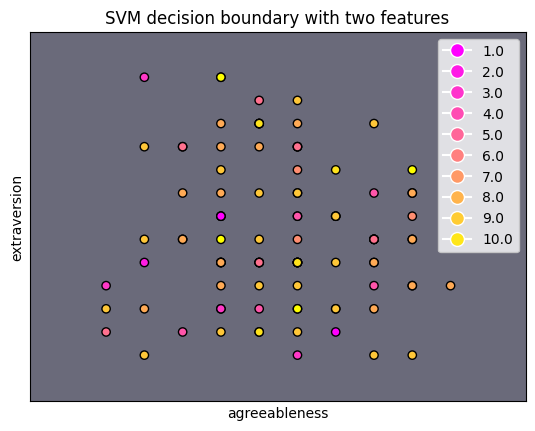